# 2. Image preprocessing using OpenCV

Computer vision as a field aims to apply set of techniques to process, analyze visual data to extract any valuable information.

On the other hand, prior to that, we need to prepare image data and convert to a suitable format. The example of such "correction" operations could include image denoising, increasing image sharpness, color balancing.

All these functions can be easily implemented using one of the most popular Computer Vision libraries - OpenCV. However, for the sake of this tutorial, we are not going to analyze all preprocessing functions and instead will look at the most useful ones.

## OpenCV functions

As it has been mentioned before, OpenCV has many built-in functions that could be used for various purposes.
We will demonstrate these example functions by using multiple cells' [image](https://www.verywellhealth.com/thmb/hmG1GEk89O-pR1lt7RCG8PRQ_2E=/4411x2911/filters:fill(87E3EF,1)/leukemia-under-microscope-5b8582ef46e0fb0050aa8108.jpg).

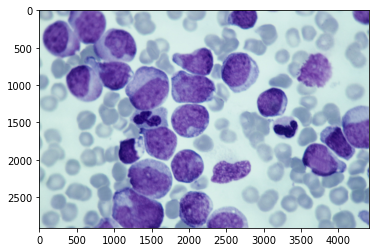

In [8]:
import cv2
import matplotlib.pyplot as plt

#Image path
path = r"C:/Users/marty/Desktop/leukemia.jpg"

image = cv2.imread(path)

# Here we are reversing the color channels
# since plt.imshow() function distorts colors
plt.imshow(image[...,::-1])

### Colorspaces

We have already partly mentioned color channels when mentioning the color distortion caused by ```plt.imshow()``` function. This is mainly due to the fact that OpenCV uses BGR colorspace instead of a more common RGB colorspace (R - red, G - green, B - blue). This is why we have to revert the color channels when using matplotlib function.

In addition to "visual purpose", there are many reasons why we might like to convert one colorspace to another one being efficiency: simplified images are easier and quicker to analyze.

Although, there are more than 150 conversion methods available in OpenCV, we will only look at a few of them.

#### BGR to Gray

Such operation "simplifies" images: instead of 3 color channels, we have only 1 channel per pixel that makes further mathematical operations less computationally intense.

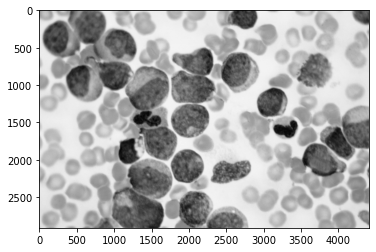

In [25]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap = 'gray')

#### BGR to HSV

In the common RGB (or BGR) colorspace, we have three components - red, blue and green - that are directly dependent from the amount of light hitting the object. Therefore, they are correlated with each other which raises difficulties when performing object discrimination.

In such cases, it is way easier to discriminate details in terms of hue, lightness, saturations which brings us to HSV colorspace. In this colorspace, we have three matrices - hue (varies from 0 to 179), saturation (0 - 255), value (0 - 255). Hue represents the color, saturation corresponds to the amount to which that color is mixed with white, while value represents the amount to which that color is mixed with black.

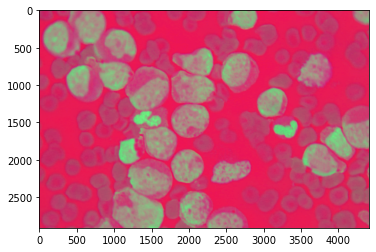

In [31]:
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

plt.imshow(hsv[...,::-1])

### Geometric transformations

- **Scaling**

It is simply resizing of the image. When performing resizing, we can choose constant dimensions or specify scaling factor (basically, reusing original dimensions and multiplying by constant). This operation is crucial in preprocessing, as prior deep learning models has specified input dimension.

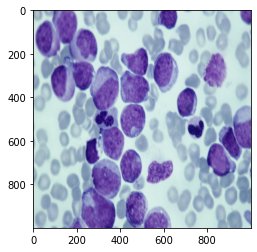

In [32]:
image_1000 = cv2.resize(image, (1000, 1000))

plt.imshow(image_1000[...,::-1])

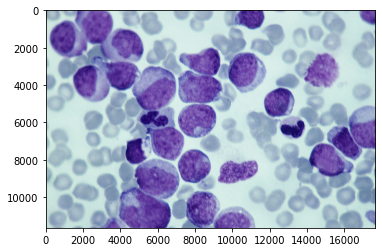

In [49]:
height, width = image.shape[:2]

image_scaled = cv2.resize(image, (4 * width, 4 * height))

plt.imshow(image_scaled[...,::-1])

- **Rotation**

When we want to rotate our image by angle $\theta$ without changing dimensions, we transform our image by the transformation matrix. Even though, it might seem as irrelevant function, rotations forms the basis of data augmentation. We will not be covering this topic in this tutorial, but the basic idea is that by performing various manipulations - changing dimension, zooming, rotating - we can increase the original data size and introduce "noise" to our dataset.

For now, let's have a look how a sample 45 degrees rotation implementation looks like:

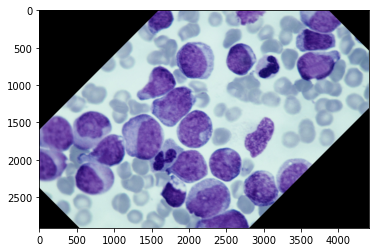

In [58]:
rows, cols, c = image.shape

#Building transformation matrix, only change the angle (45 in this example)
M = cv2.getRotationMatrix2D(((cols - 1) / 2.0, (rows - 1 ) / 2.0), 45, 1)

rotated_image = cv2.warpAffine(image, M, (cols, rows))

plt.imshow(rotated_image[..., ::-1])

### Image thresholding

We have already used thresholding during the neural events clustering challenge when we compared the mean values to threshold and ignored values that were smaller.

When it comes to the image thresholding, it is quite similar, however, it deviates a bit from type to type.

- **Regular thresholding**

This is thresholding type that has been just described in the previous section. Each pixel is compared to a constant threshold: if the value is smaller, the value at that point is set to maximum, otherwise, it is set to mininum (0).

When we use threshold function, we have to specify a type (see below their comparison).
![image](https://docs.opencv.org/4.x/threshold.jpg)

Let's say, we want to apply binary inverse thresholding, while the lower threshold value is 120.

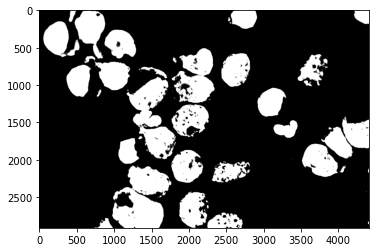

In [77]:
ret, thresh = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY_INV)

plt.imshow(thresh, 'gray')

- **Adaptive thresholding**

In some cases, our image might be distorted due to a change in lighting in which case, the simple threshold is not the most suitable method. In such situation, the adaptive thresholding might be a better option. The idea behind the algorithm is that it determines the threshold value for a pixel based on a region around it.

The adaptive treshold function can either use the **mean** of the area of **gausian-weighted sum**. This value is then subtracted by our specified constant.

In [89]:
image_1 = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, \
                               cv2.THRESH_BINARY, 11, 2)

image_2 = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, \
                               cv2.THRESH_BINARY, 11, 2)

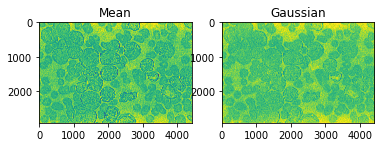

In [106]:
plt.subplot(1, 2, 1)
plt.imshow(image_1)
plt.title('Mean')
plt.subplot(1, 2, 2)
plt.title('Gaussian')
plt.imshow(image_2)

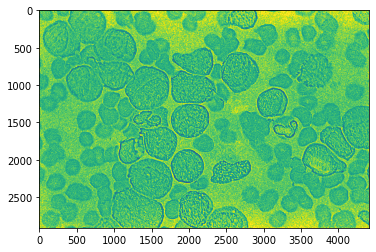

In [108]:
plt.imshow(image_1)